## Goal: Find the variables which are strong indicators of default.

Import libs

In [1]:
import pandas as pd
import numpy as np
import dtale
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [2]:
application_df = pd.read_csv('data/application_data.csv')

In [3]:
application_df.shape

(307511, 122)

In [4]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

## Data cleaning

In [6]:
null_percentages = ((application_df.isnull().sum() / len(application_df)) * 100).sort_values(ascending=False)
print(null_percentages)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64


In [7]:
# Filter columns where null percentage is higher than 40%
columns_with_high_null_percentage = null_percentages[null_percentages > 40].index.tolist()

In [8]:
application_df.drop(columns=columns_with_high_null_percentage, inplace=True)

In [9]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
application_df.isna().sum().sort_values(ascending=False).head(20)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
dtype: int64

## Sanity Check

In [12]:
application_df.DAYS_BIRTH.max()

-7489

In [13]:
application_df[application_df["DAYS_BIRTH"] > 0].value_counts()

Series([], Name: count, dtype: int64)

In [14]:
application_df.DAYS_EMPLOYED.max()

365243

In [15]:
application_df[application_df["DAYS_EMPLOYED"] > 0].values.tolist()


[[100011,
  0,
  'Cash loans',
  'F',
  'N',
  'Y',
  0,
  112500.0,
  1019610.0,
  33826.5,
  913500.0,
  'Children',
  'Pensioner',
  'Secondary / secondary special',
  'Married',
  'House / apartment',
  0.018634,
  -20099,
  365243,
  -7427.0,
  -3514,
  1,
  0,
  0,
  1,
  0,
  0,
  nan,
  2.0,
  2,
  2,
  'WEDNESDAY',
  14,
  0,
  0,
  0,
  0,
  0,
  0,
  'XNA',
  0.2057472880073281,
  0.7517237147741489,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [100015,
  0,
  'Cash loans',
  'F',
  'N',
  'Y',
  0,
  38419.155,
  148365.0,
  10678.5,
  135000.0,
  'Children',
  'Pensioner',
  'Secondary / secondary special',
  'Married',
  'House / apartment',
  0.015221,
  -20417,
  365243,
  -5246.0,
  -2512,
  1,
  0,
  0,
  1,
  1,
  0,
  nan,
  2.0,
  2,
  2,
  'FRIDAY',
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  'XNA',
  0.5551831615131809,
  0.65289655198065

In [16]:
application_df[application_df["DAYS_REGISTRATION"] > 0].values.tolist()


[]

In [17]:
application_df.DAYS_EMPLOYED.max()

365243

In [18]:
application_df[application_df["DAYS_ID_PUBLISH"] > 0].values.tolist()

[]

In [19]:
d = dtale.show(application_df)
d.open_browser()

In [20]:
application_df.drop(["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"], inplace=True, axis=1)

## Categorical Data Analysis

/tmp/ipykernel_22256/2765780625.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/2765780625.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/2765780625.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/2765780625.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/2765780625.py:14: FutureWarning:



Passing `palette` without assigning `hue` is de

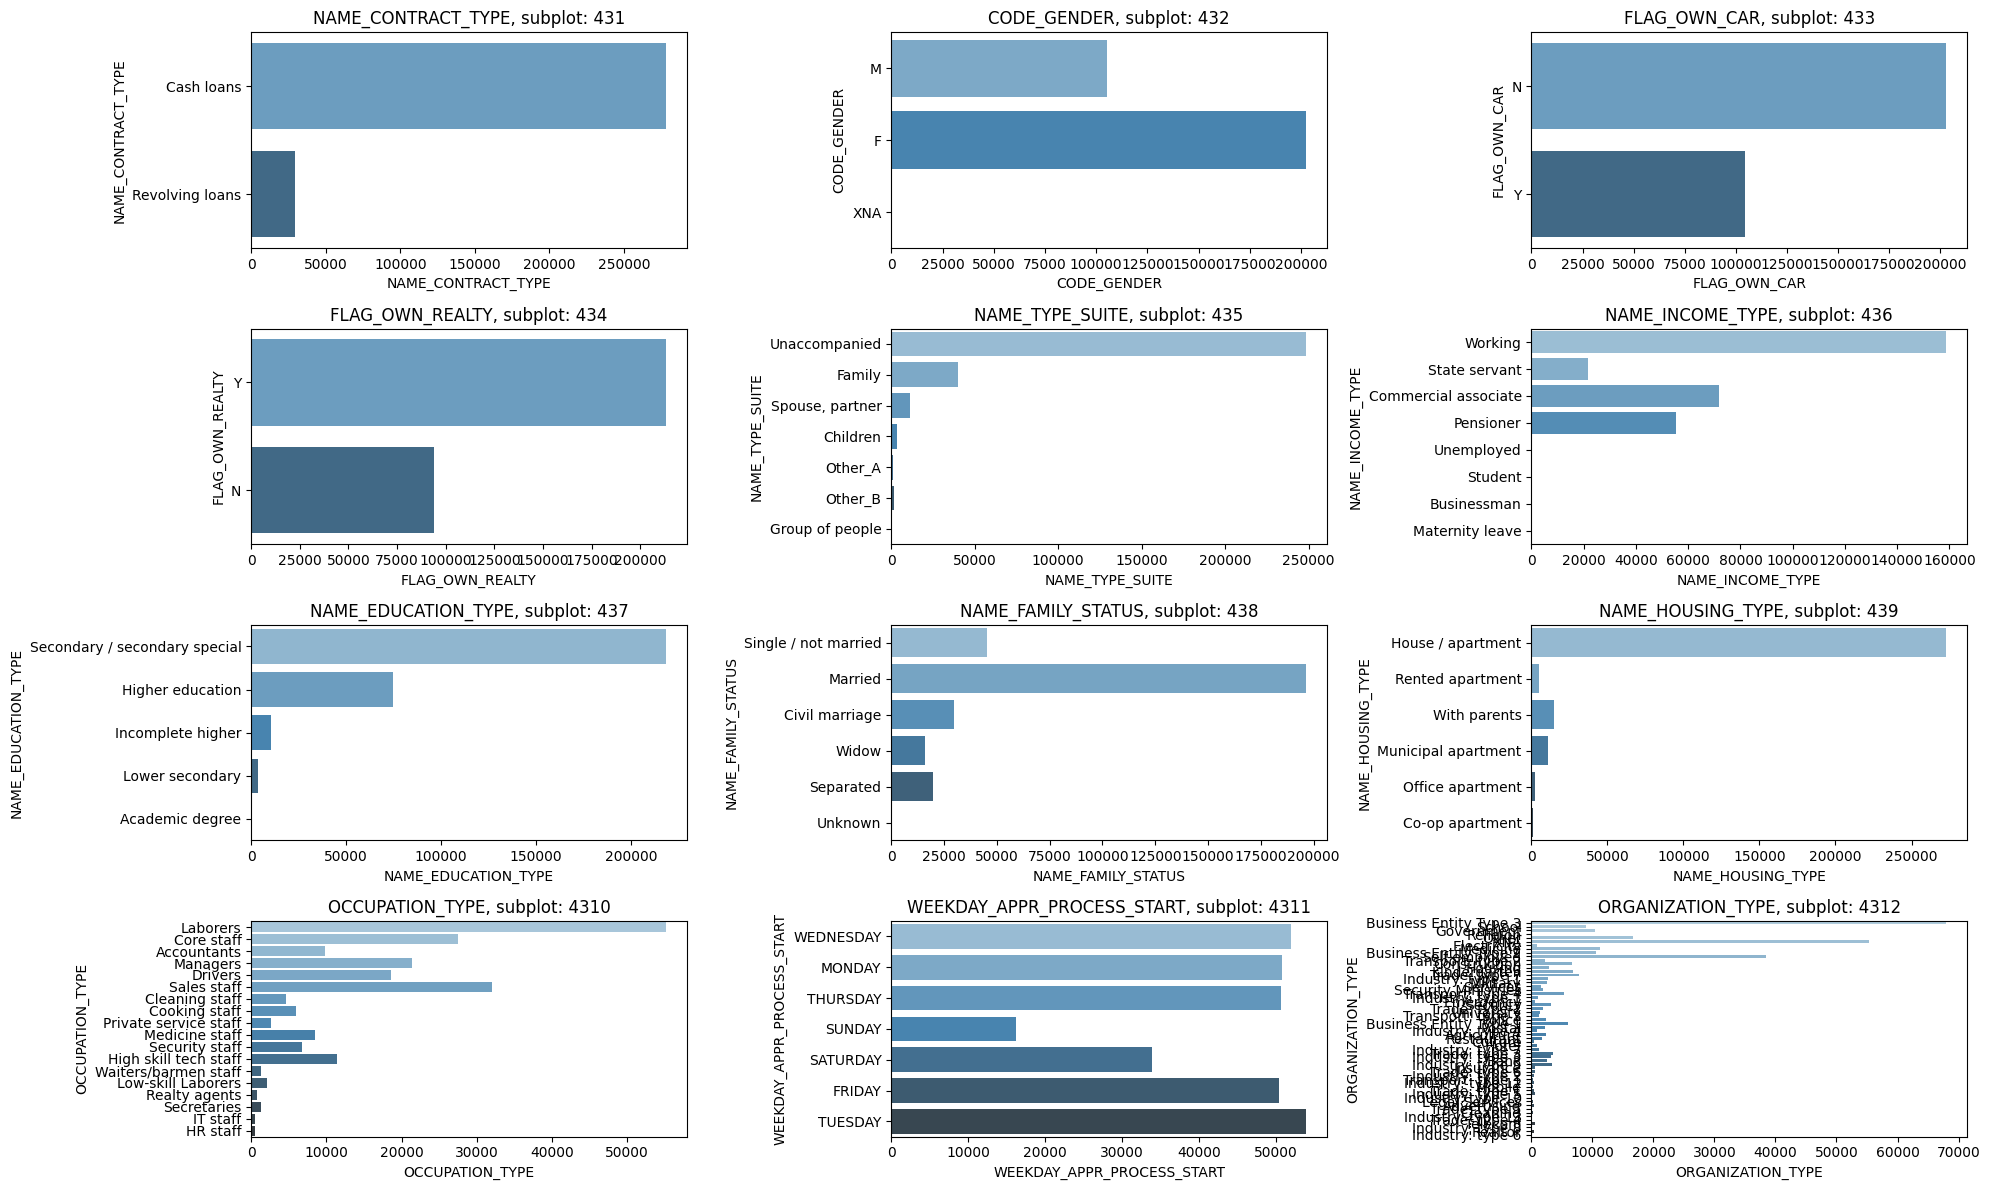

In [21]:
#  Object Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,12))

for i in application_df.columns:
    if application_df[i].dtypes=="object":

        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.countplot(application_df[i],palette="Blues_d")
        c = c + 1

fig.tight_layout()
plt.show()

## Numerical Data Analysis

In [22]:
application_df["AMT_ANNUITY"].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

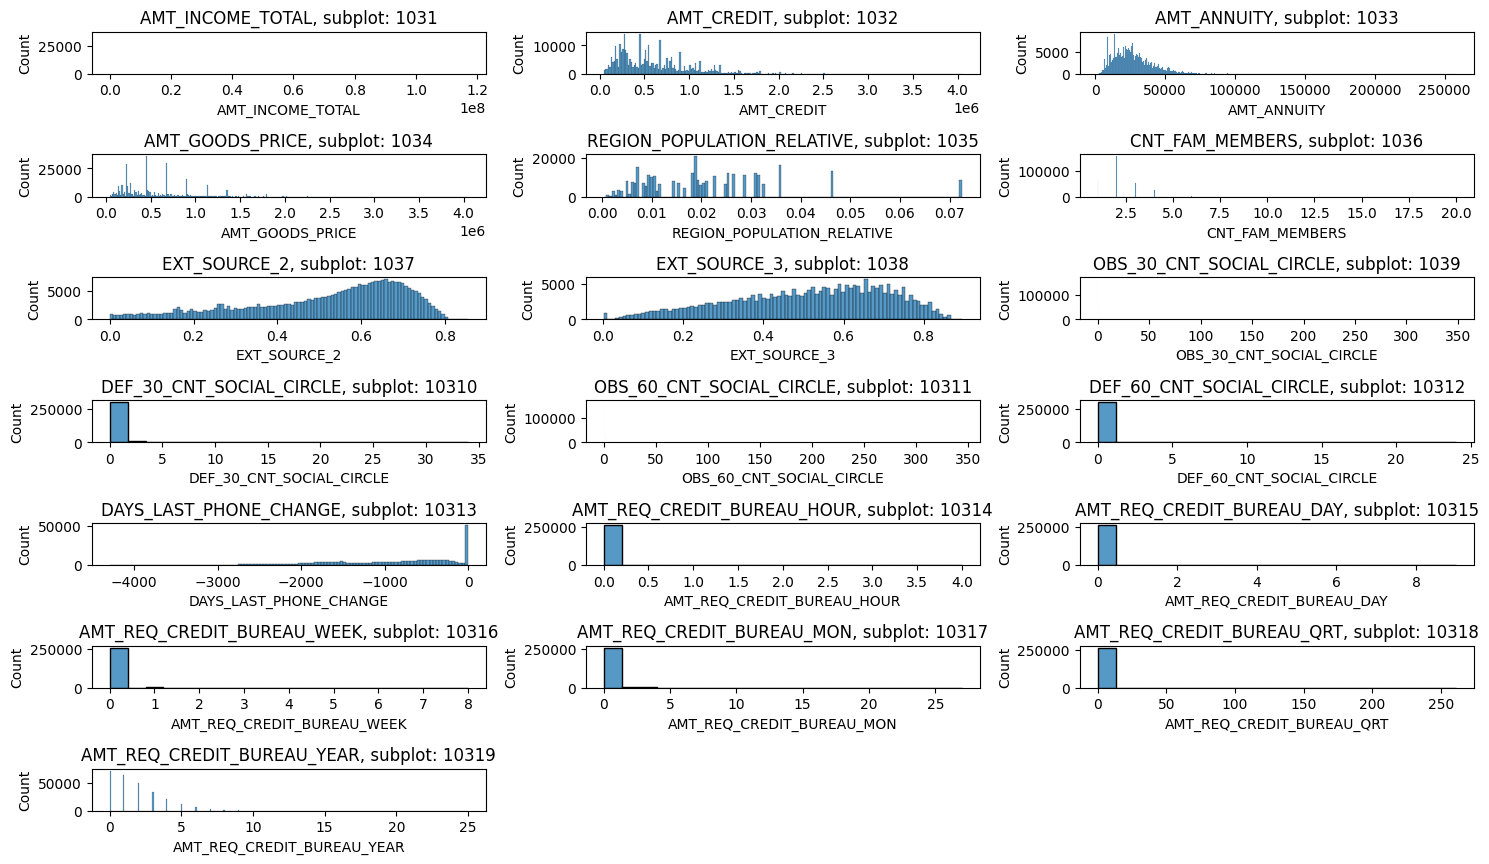

In [23]:
#  Float Data
a = 10  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in application_df.columns:
    if application_df[i].dtypes=="float64" or application_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.histplot(application_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 30, not 31

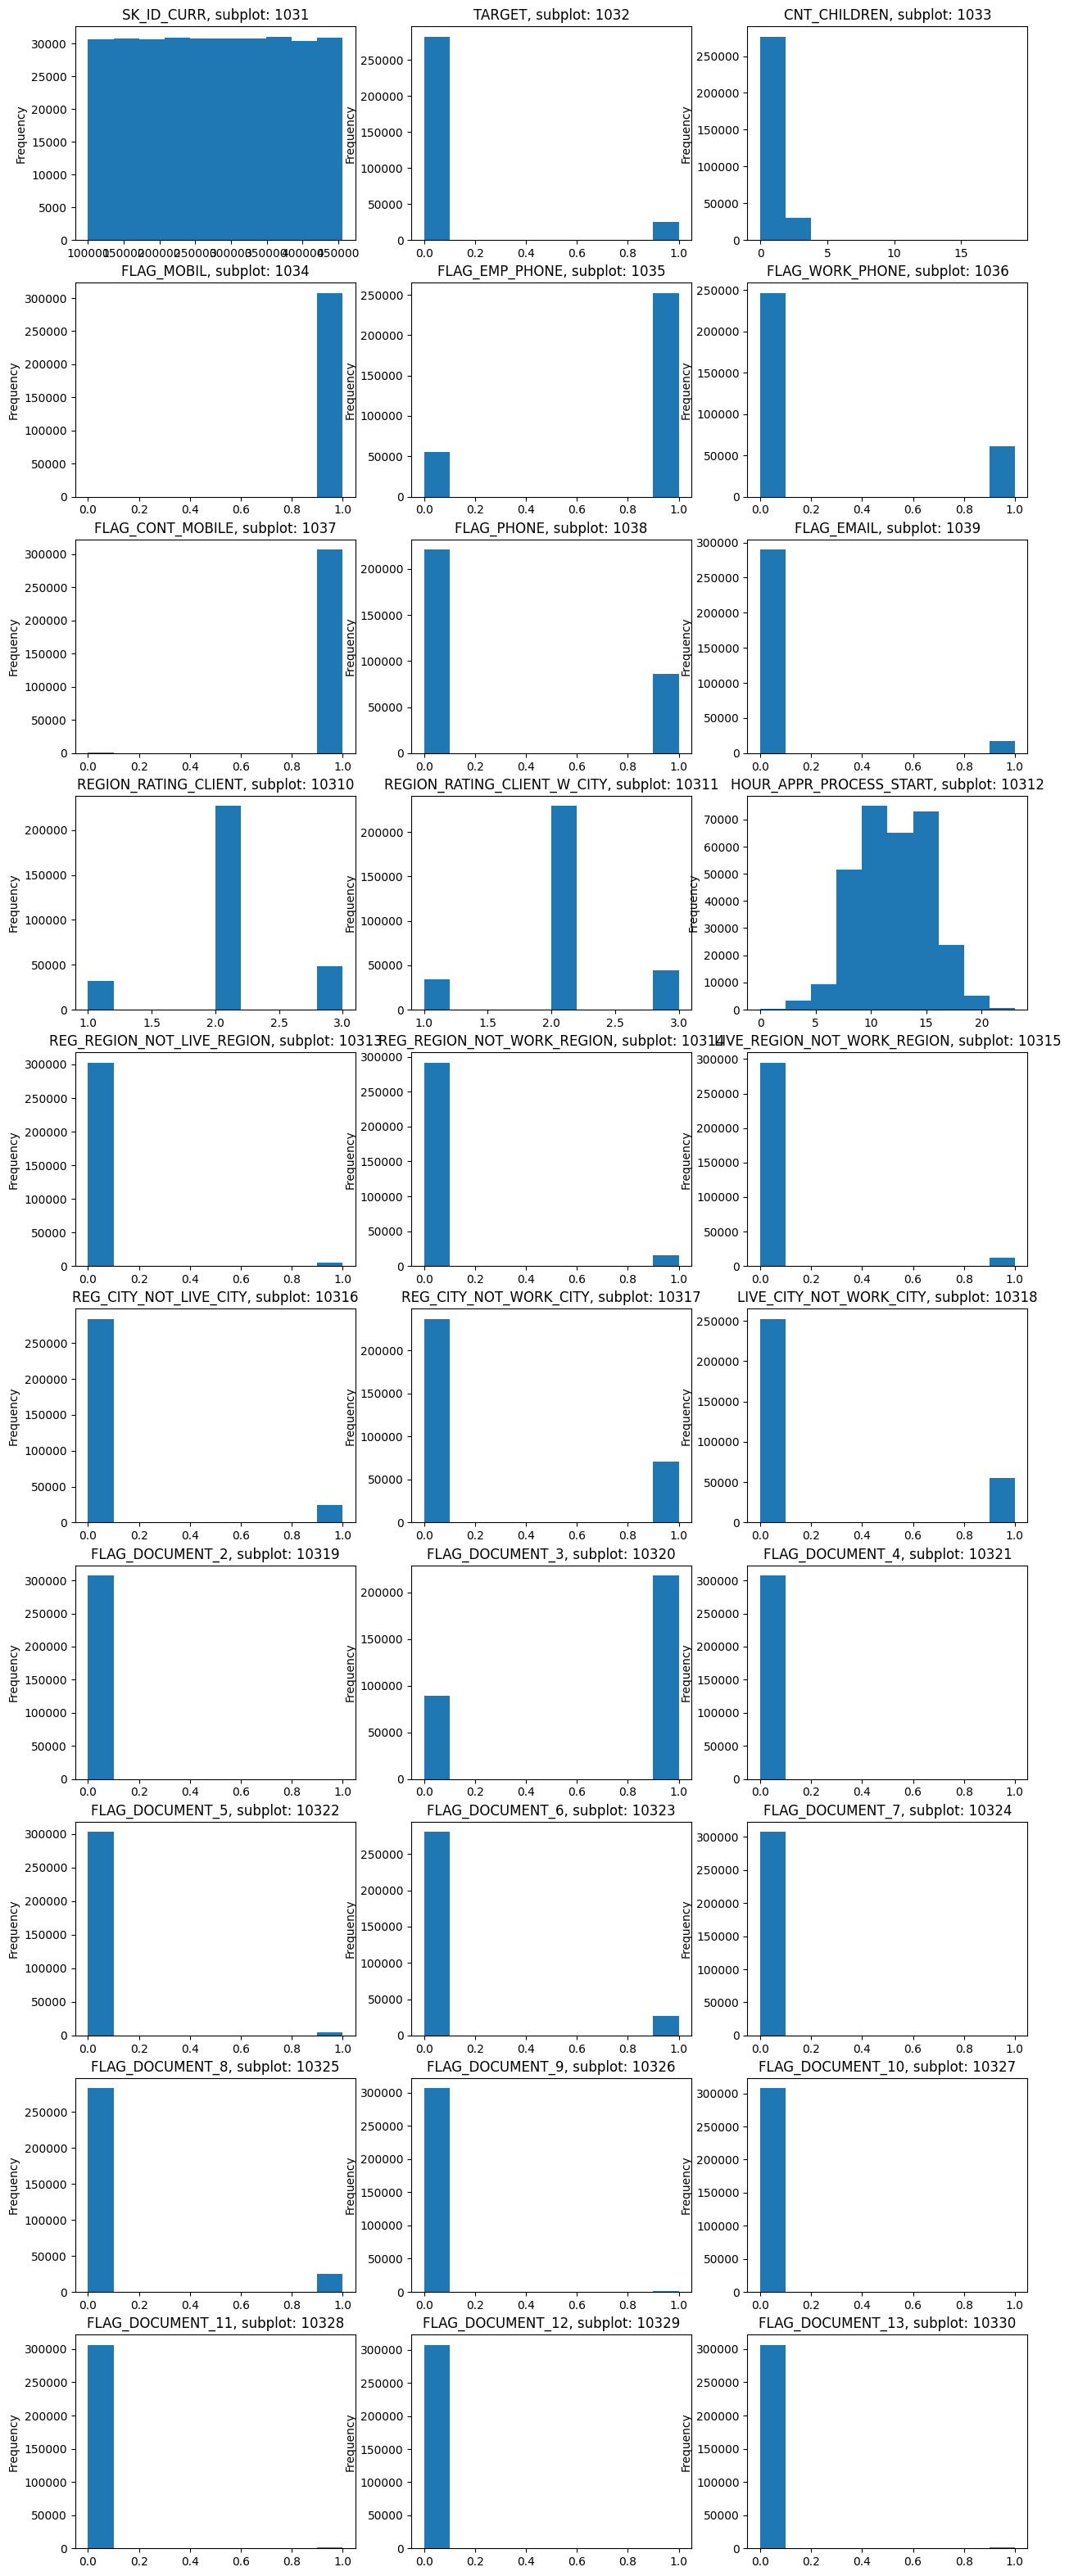

In [24]:
#  Float Data
a = 10 # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,40))

for i in application_df.columns:
    if application_df[i].dtypes=="int64" or application_df[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        application_df[i].plot.hist()
        c = c + 1

fig.tight_layout()
plt.show()

## Cat vs Cat

Graph for :  NAME_CONTRACT_TYPE


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



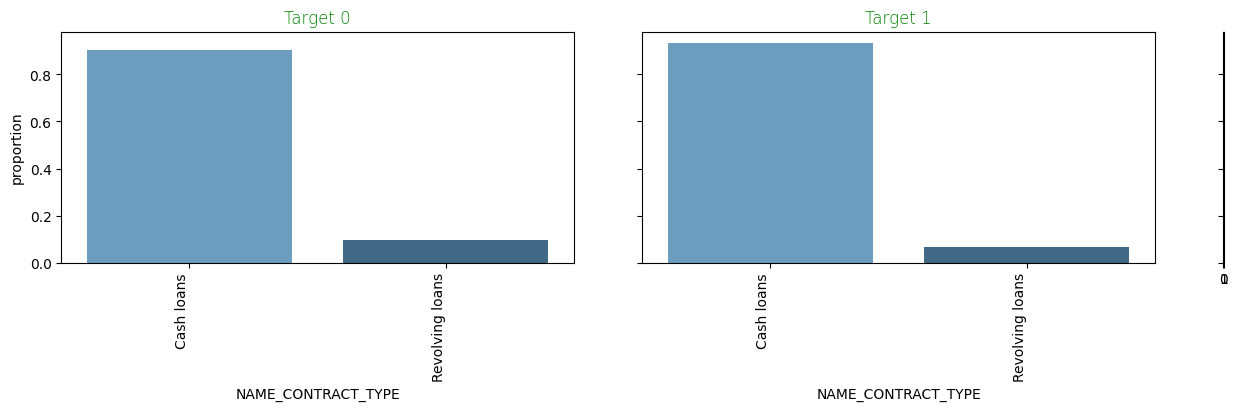

Graph for :  CODE_GENDER


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



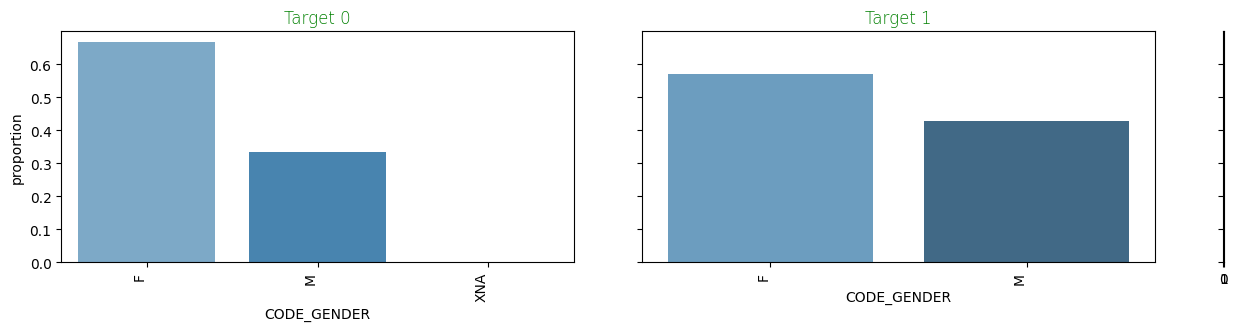

Graph for :  FLAG_OWN_CAR


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



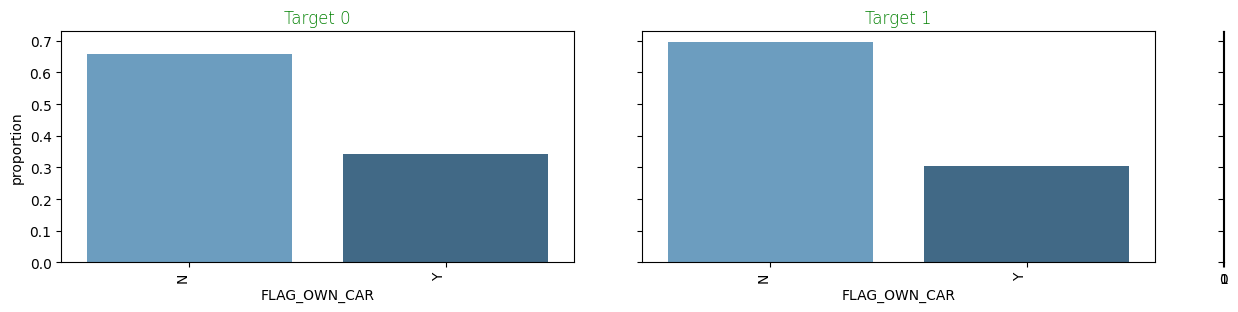

Graph for :  FLAG_OWN_REALTY


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



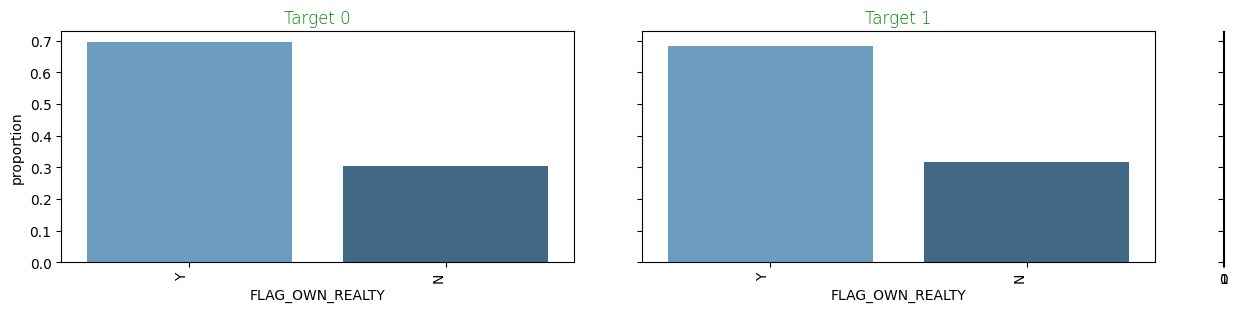

Graph for :  NAME_TYPE_SUITE


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



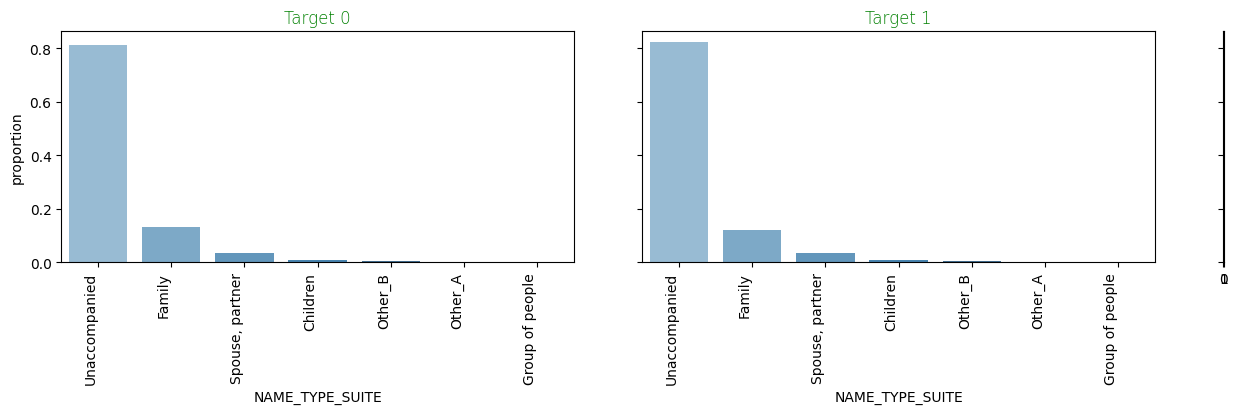

Graph for :  NAME_INCOME_TYPE


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



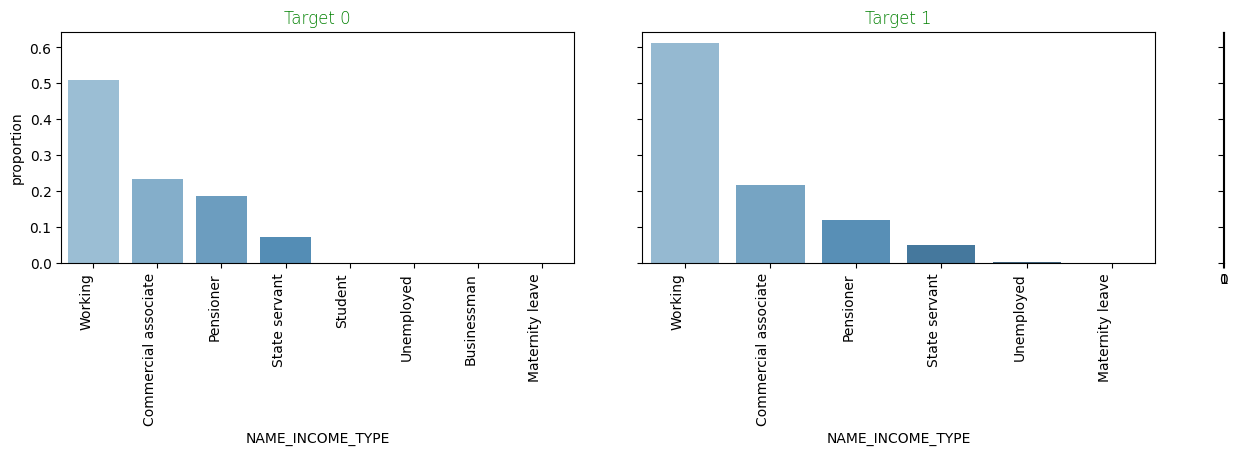

Graph for :  NAME_EDUCATION_TYPE


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



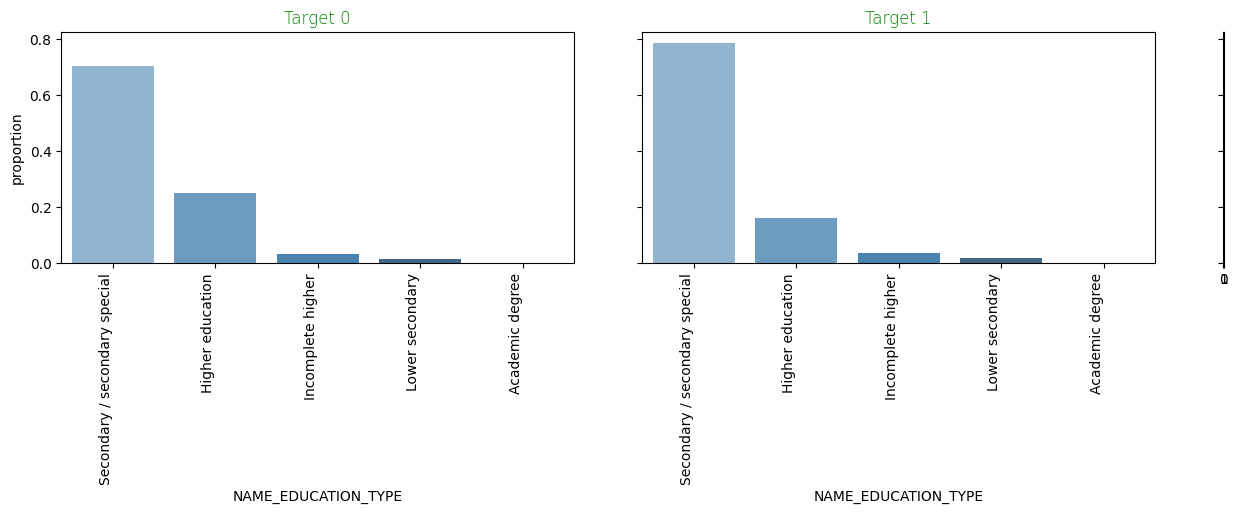

Graph for :  NAME_FAMILY_STATUS


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



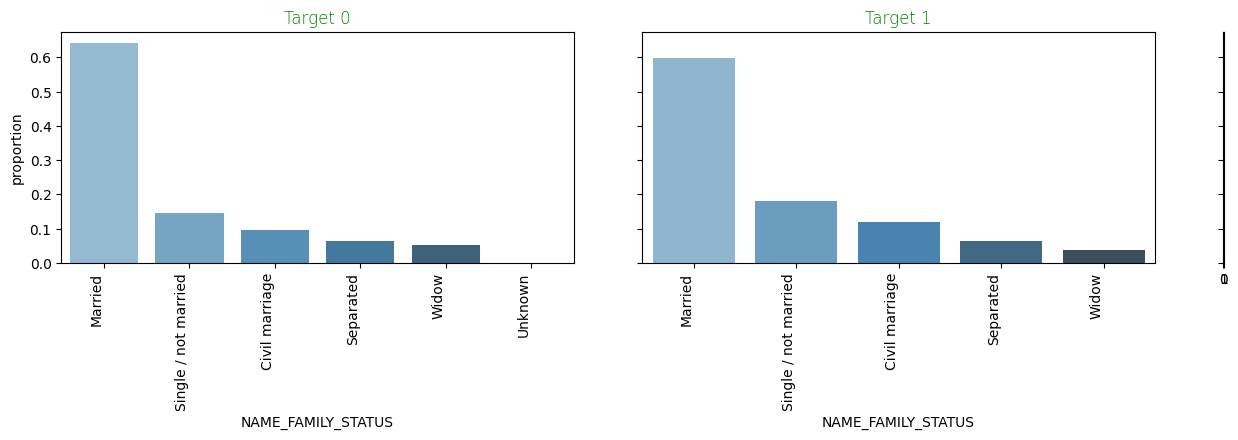

Graph for :  NAME_HOUSING_TYPE


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



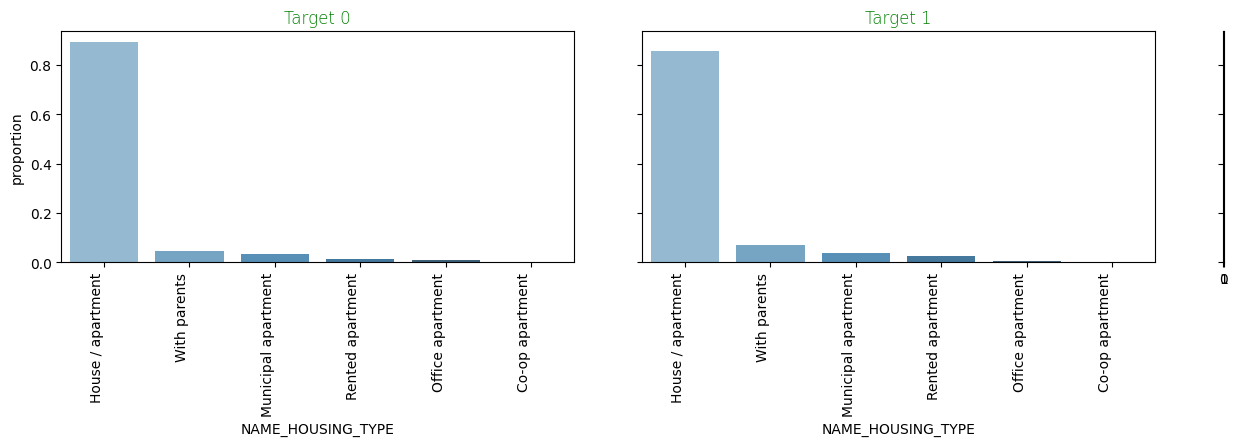

Graph for :  OCCUPATION_TYPE


/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



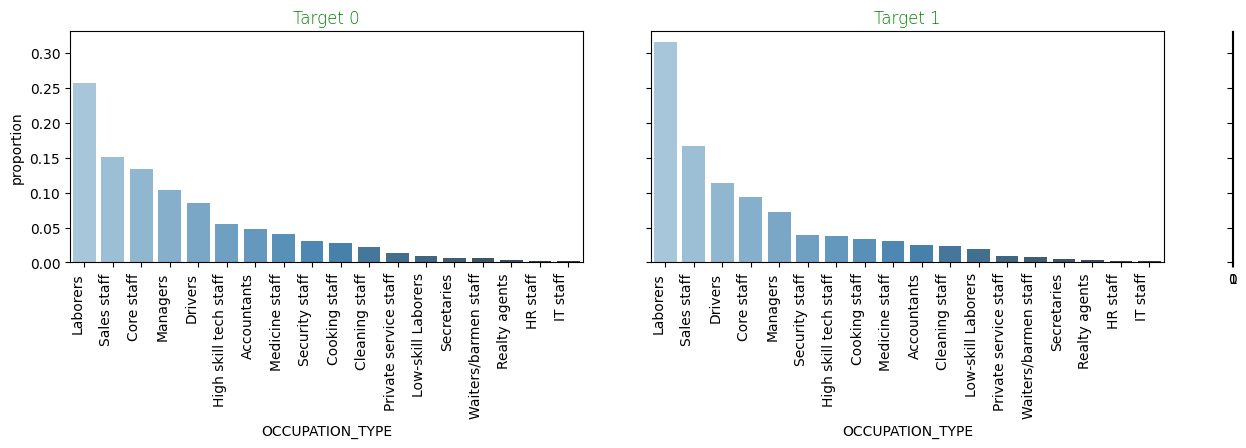

2024-05-29 23:42:00,666 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


2024-05-29 23:42:00,671 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

2024-05-29 23:42:00,710 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be

Graph for :  WEEKDAY_APPR_PROCESS_START


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



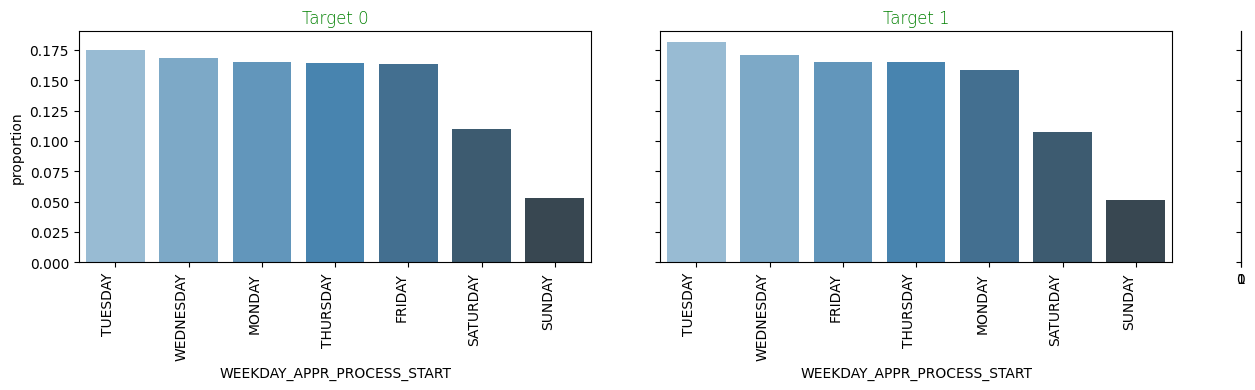

/tmp/ipykernel_22256/1088249675.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Graph for :  ORGANIZATION_TYPE


/tmp/ipykernel_22256/1088249675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_22256/1088249675.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_22256/1088249675.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



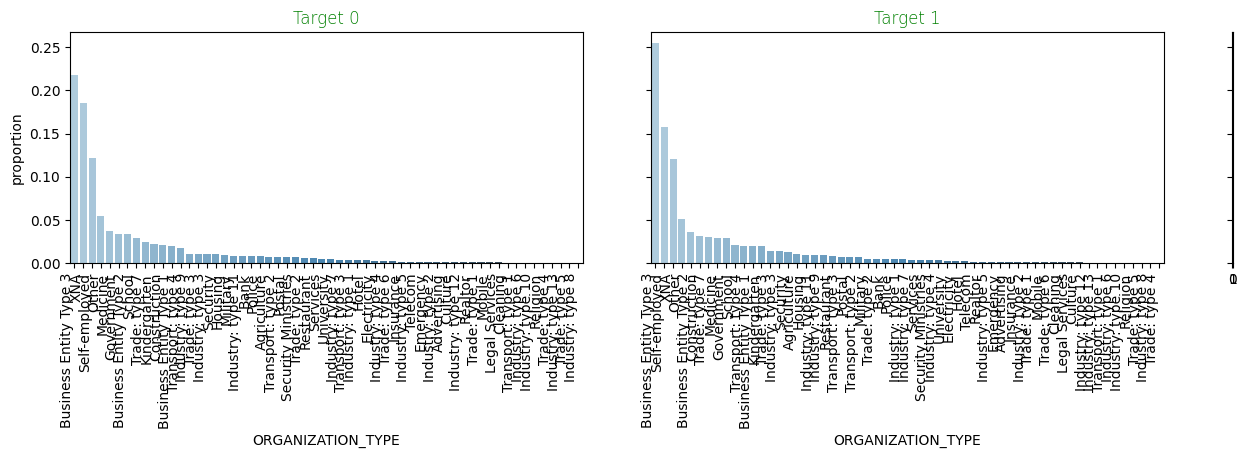

In [25]:
category_columns = application_df.select_dtypes(include=['object']).columns
for i in category_columns:
    
    cat_num_0=application_df[application_df["TARGET"] == 0][i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,3))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=application_df[application_df["TARGET"] == 1][i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

## Multivariates Analysis

In [ ]:
def impute_missing_with_mean(df):
    """
    Impute missing values in numerical columns with the mean.

    Parameters:
    - df: DataFrame containing the data.

    Returns:
    - DataFrame with missing values imputed with mean.
    """
    for column in df.select_dtypes(include='number').columns:
        if df[column].isnull().any():
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
    return df

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def column_target_correlation(df, column_name):
    """
    Calculate the correlation between a specific column and a target variable.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: Name of the column for which correlation with the target variable is to be calculated.
    - target_column: Name of the target variable column.

    Returns:
    - Correlation coefficient between the specified column and the target variable.
    """
    correlation = df[column_name].corr(df["TARGET"])
    return {
        column_name: correlation
    }


In [ ]:
application_df = impute_missing_with_mean(application_df)

# The correlation score is ordered for potential numerical columns

In [46]:
chosen_numerical_corr = []
for column in application_df.select_dtypes(include="number").columns:
    chosen_numerical_corr.append(column_target_correlation(application_df, column))
sorted_data = sorted(
    chosen_numerical_corr, key=lambda x: list(x.values())[0], reverse=True
)
sorted_data

[{'TARGET': 1.0},
 {'REGION_RATING_CLIENT_W_CITY': 0.060892667564823415},
 {'REGION_RATING_CLIENT': 0.05889901494571238},
 {'DAYS_LAST_PHONE_CHANGE': 0.05521847562884947},
 {'REG_CITY_NOT_WORK_CITY': 0.05099446436812667},
 {'FLAG_EMP_PHONE': 0.04598221971659251},
 {'REG_CITY_NOT_LIVE_CITY': 0.04439537480570111},
 {'FLAG_DOCUMENT_3': 0.044346346851144865},
 {'LIVE_CITY_NOT_WORK_CITY': 0.0325183411014988},
 {'DEF_30_CNT_SOCIAL_CIRCLE': 0.03222153390591371},
 {'DEF_60_CNT_SOCIAL_CIRCLE': 0.03125121111173646},
 {'FLAG_WORK_PHONE': 0.028524322363217502},
 {'CNT_CHILDREN': 0.019187133596269994},
 {'AMT_REQ_CREDIT_BUREAU_YEAR': 0.018160138737084826},
 {'CNT_FAM_MEMBERS': 0.009307781738417764},
 {'OBS_30_CNT_SOCIAL_CIRCLE': 0.009123291153639138},
 {'OBS_60_CNT_SOCIAL_CIRCLE': 0.00901485673091399},
 {'REG_REGION_NOT_WORK_REGION': 0.006941907545371621},
 {'REG_REGION_NOT_LIVE_REGION': 0.005575944520908466},
 {'FLAG_DOCUMENT_2': 0.005417144279619333},
 {'FLAG_DOCUMENT_21': 0.003708625029306517},


## Scatter Plot and pairplot

In [28]:
def scatter_plot(df, column_name, target_column):
    """
    Generate a scatter plot between a specific column and a target variable.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: Name of the column to be plotted on the x-axis.
    - target_column: Name of the target variable column to be plotted on the y-axis.

    Returns:
    - None (displays the scatter plot).
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=column_name, y=target_column)
    plt.title(f'Scatter Plot of {column_name} vs {target_column}')
    plt.xlabel(column_name)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()

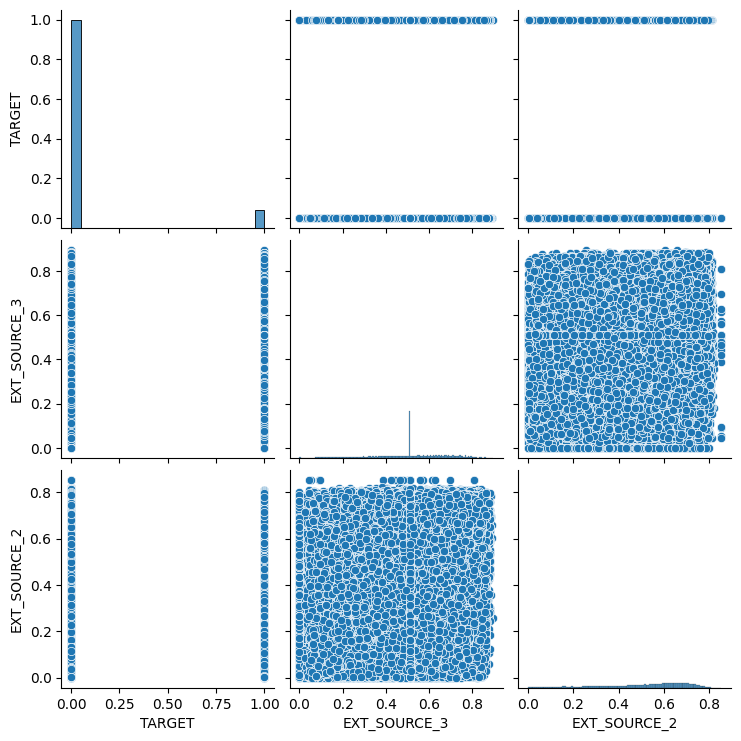

In [48]:
sns.pairplot(data=application_df, vars=["TARGET", "EXT_SOURCE_3", "EXT_SOURCE_2"])

plt.show()

## Heat map

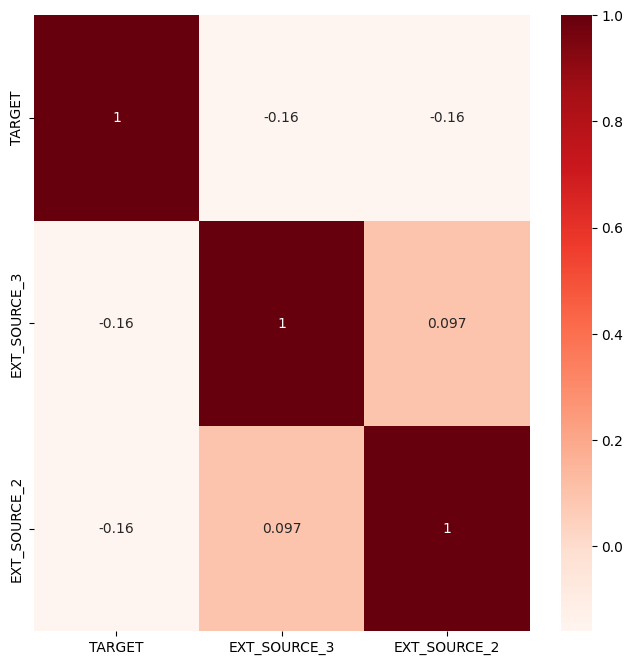

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(
    application_df[["TARGET", "EXT_SOURCE_3", "EXT_SOURCE_2"]].corr(),
    annot=True,
    cmap="Reds",
)
plt.show()

2024-05-30 00:20:47,508 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-30 00:20:47,593 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


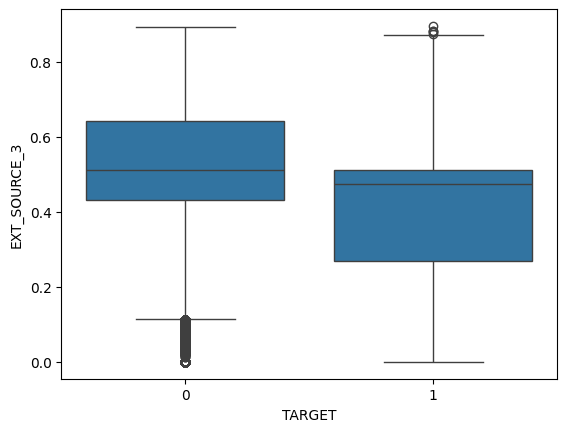

In [53]:
sns.boxplot(data=application_df, x="TARGET", y="EXT_SOURCE_3")
plt.show()

2024-05-30 00:20:57,211 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-30 00:20:57,297 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


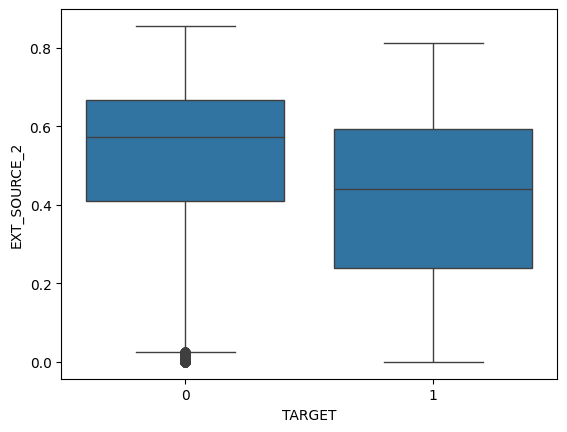

In [54]:
sns.boxplot(data=application_df, x="TARGET", y="EXT_SOURCE_2")
plt.show()